<a href="https://colab.research.google.com/github/pranitakhade/COB-Data-Science/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/dataset - netflix1.csv")

In [3]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
data.shape

(8790, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [8]:
data['date_added'] = pd.to_datetime(data['date_added'], format="%m/%d/%Y")
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

In [9]:
genre = data['listed_in'].str.split(",", expand = True)

In [10]:
duration = lambda duration : int(''.join(filter(str.isdigit, duration)))
data['duration']= data['duration'].apply(duration)

In [11]:
data.describe()

,release_year,duration
count,8790.000000,8790.000000
mean,2014.183163,69.934471
std,8.825466,50.794433
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.500000
75%,2019.000000,106.000000
max,2021.000000,312.000000


In [12]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies"


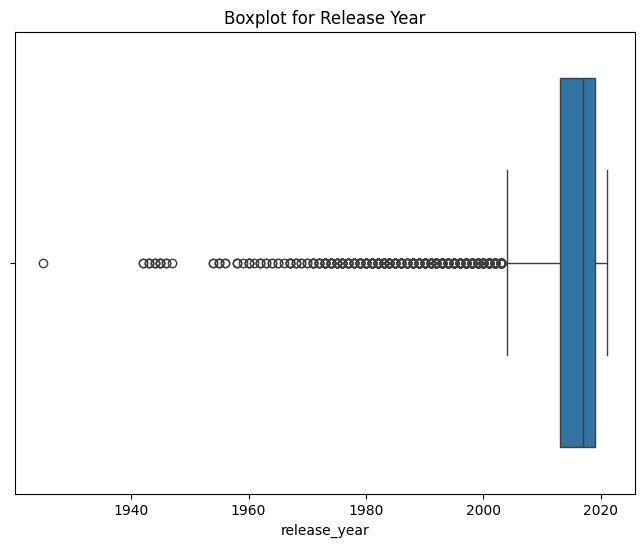

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['release_year'])
plt.title('Boxplot for Release Year')
plt.show()

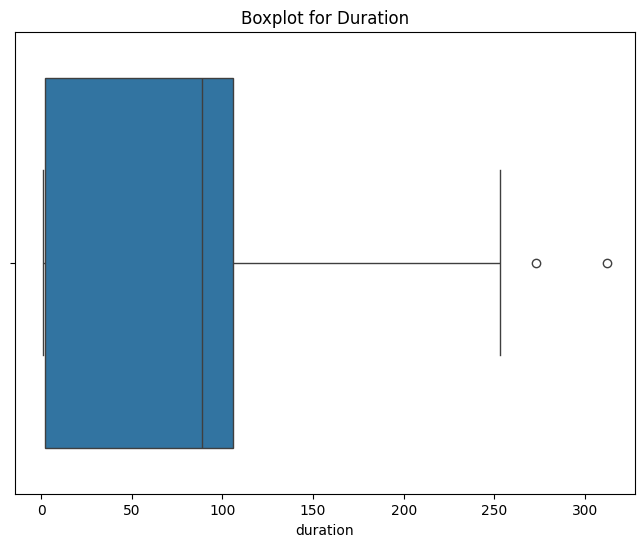

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['duration'])
plt.title('Boxplot for Duration')
plt.show()

In [15]:
def remove_outliers_iqr(data, columns):
    for column in columns:
        if data[column].dtype in ['int64', 'float64']:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [16]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
data = remove_outliers_iqr(data, numerical_columns)

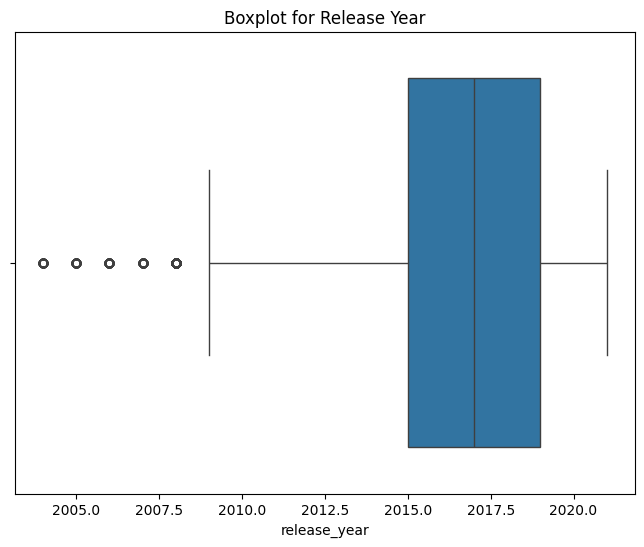

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['release_year'])
plt.title('Boxplot for Release Year')
plt.show()


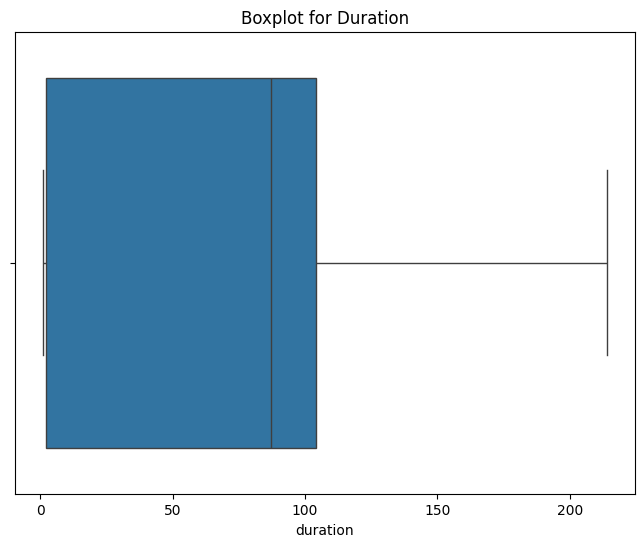

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['duration'])
plt.title('Boxplot for Duration')
plt.show()